<a href="https://colab.research.google.com/github/1900690/drone/blob/main/panorama_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#GCP設定なし

In [4]:
#画像を入れるフォルダを作成
import os
SAVE_NAME = 'image'
if not os.path.exists('/content/' +SAVE_NAME):
    os.mkdir('/content/' +SAVE_NAME)

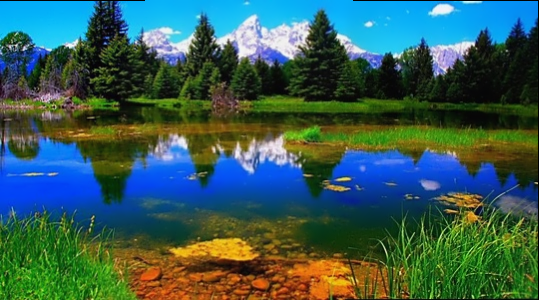

True

In [10]:
import cv2
from google.colab.patches import cv2_imshow
import glob

#階層移動
os.chdir("/content/image")
#階層内のPathを全取得
path = glob.glob("*")
os.chdir("/content")

imgs = []
for path_name in path:
  imgs.append(cv2.imread('/content/image/'+path_name))

stitcher = cv2.Stitcher_create()
stitched = stitcher.stitch(imgs)[1]

cv2_imshow(stitched)
cv2.imwrite("/content/result.jpg", stitched)